In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sys
sys.path.append('../')
from dataset.PointCloudDataset import PointCloudDataset
from dataset.voxelDataset import VoxelDataset

c:\Users\alazz\.conda\envs\torch_gpu\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [11]:
paths = ['dataset/ModelNet40/flower_pot/test/flower_pot_0152.off',
        'dataset/ModelNet40/car/test/car_0265.off',
        'dataset/ModelNet40/guitar/test/guitar_0157.off',
        'dataset/ModelNet40/bottle/test/bottle_0336.off']

In [12]:
paths[0]

'dataset/ModelNet40/flower_pot/test/flower_pot_0152.off'

In [25]:
# visualize the point cloud from file 
mesh = o3d.io.read_triangle_mesh(paths[1])
# point cloud from mesh
pc = mesh.sample_points_uniformly(number_of_points=10000)
# change color to darkred   
pc.paint_uniform_color([0.9, 0, 0.1])


# plot pc with color darkred    
o3d.visualization.draw_geometries([pc]) 


In [22]:
mesh = o3d.io.read_triangle_mesh(paths[1])

xyz=mesh

R = xyz.get_rotation_matrix_from_xyz((0, 0, np.pi/2))
xyz = xyz.rotate(R, center=(0,0,0))


In [24]:
pc = xyz.sample_points_uniformly(number_of_points=10000)
o3d.visualization.draw_geometries([pc]) 


In [14]:
xyz = pc

R = xyz.get_rotation_matrix_from_xyz((0, 0, np.pi/2))
xyz = xyz.rotate(R, center=(0,0,0))

In [15]:
xyz

PointCloud with 10000 points.

In [17]:
o3d.visualization.draw_geometries([xyz]) 

In [54]:
angle = np.arange(-np.pi/2, np.pi/2 +  np.pi/4, np.pi/4)

In [55]:
angle

array([-1.57079633, -0.78539816,  0.        ,  0.78539816,  1.57079633])

In [59]:
np.random.choice(angle)

0.7853981633974483

In [64]:
augmented = augment(o3d.io.read_triangle_mesh(paths[1]).sample_points_uniformly(number_of_points=10000))


In [65]:
o3d.visualization.draw_geometries([augmented]) 

In [60]:
path_try = 'dataset/modelnet40_normal_resampled/airplane/train/airplane_0001.txt'

path_try_2 = 'dataset/modelnet40_normal_resampled/car/train/car_0265.txt'

In [61]:
x = np.loadtxt(path_try_2, delimiter=',')

In [62]:
x

array([[-0.02189, -0.1217 ,  0.1415 ,  0.     , -0.9996 , -0.02907],
       [ 0.07593,  0.02519, -0.9953 ,  0.1663 ,  0.1977 , -0.966  ],
       [ 0.07083,  0.2073 ,  0.9737 ,  0.2263 ,  0.7645 ,  0.6035 ],
       ...,
       [-0.3646 ,  0.04742,  0.4856 ,  0.3377 ,  0.3585 ,  0.8703 ],
       [-0.1137 ,  0.2046 ,  0.9235 , -0.1131 ,  0.9935 , -0.01002],
       [ 0.07054,  0.2056 ,  0.9744 ,  0.12   , -0.1782 ,  0.9766 ]])

In [63]:
x = x[:, :3]
x

array([[-0.02189, -0.1217 ,  0.1415 ],
       [ 0.07593,  0.02519, -0.9953 ],
       [ 0.07083,  0.2073 ,  0.9737 ],
       ...,
       [-0.3646 ,  0.04742,  0.4856 ],
       [-0.1137 ,  0.2046 ,  0.9235 ],
       [ 0.07054,  0.2056 ,  0.9744 ]])

In [64]:
x.shape

(10000, 3)

In [65]:
x = np.reshape(x, (-1, 3))
x

array([[-0.02189, -0.1217 ,  0.1415 ],
       [ 0.07593,  0.02519, -0.9953 ],
       [ 0.07083,  0.2073 ,  0.9737 ],
       ...,
       [-0.3646 ,  0.04742,  0.4856 ],
       [-0.1137 ,  0.2046 ,  0.9235 ],
       [ 0.07054,  0.2056 ,  0.9744 ]])

In [66]:
x.shape

(10000, 3)

In [67]:
x[:, 0].shape

(10000,)

In [68]:
import matplotlib.pyplot as plt

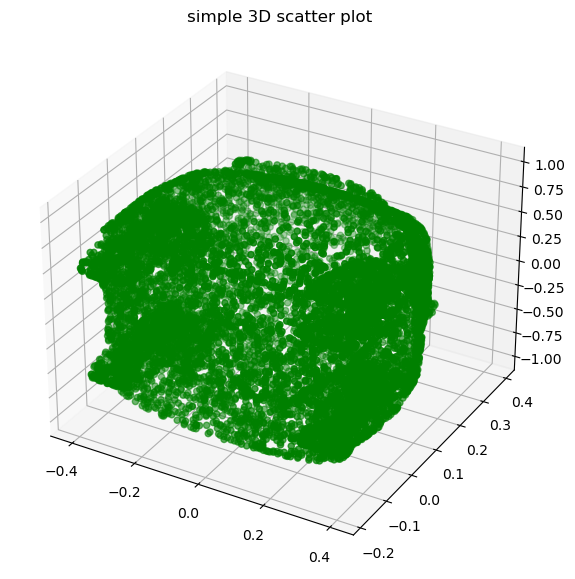

In [69]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x[:,0], x[:,1], x[:,2], color = "green")
plt.title("simple 3D scatter plot")

plt.show()

In [70]:
def Rz(theta):
  return np.matrix([[ np.cos(theta), -np.sin(theta), 0 ],
                   [ np.sin(theta), np.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

In [71]:
#rotation 3d around z axis
angle_list = np.arange(-np.pi/2, np.pi/2 +  np.pi/4, np.pi/4)

angle = np.random.choice(angle_list)

x_rot = x.dot(Rz(angle))


In [72]:
x_rot.shape

(10000, 3)

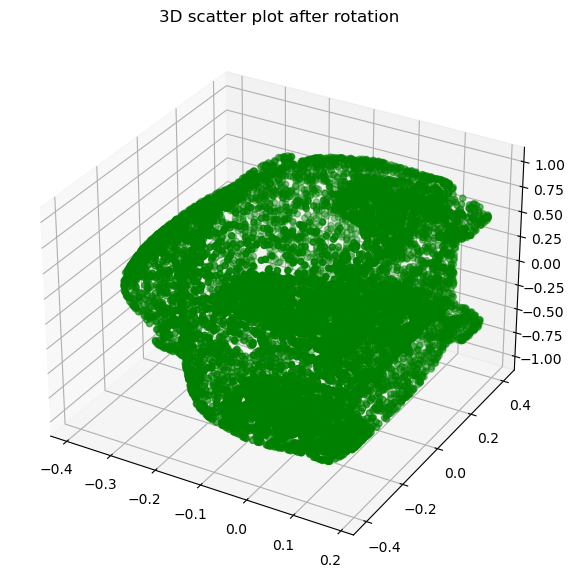

In [73]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

ax.scatter3D(x_rot[:,0], x_rot[:,1], x_rot[:,2], color = "green")
plt.title("3D scatter plot after rotation")

plt.show()

In [74]:
R = x.get_rotation_matrix_from_xyz((0, 0, np.pi/2))
x = x.rotate(R, center=(0,0,0))

AttributeError: 'numpy.ndarray' object has no attribute 'get_rotation_matrix_from_xyz'